In [50]:
import pandas as pd

df_coffee = pd.read_feather('data/coffee_ratings_full.feather')
df_coffee


total_cup_points  species                     owner country_of_origin  \
0                90.58  Arabica                 metad plc          Ethiopia   
1                89.92  Arabica                 metad plc          Ethiopia   
2                89.75  Arabica  grounds for health admin         Guatemala   
3                89.00  Arabica       yidnekachew dabessa          Ethiopia   
4                88.83  Arabica                 metad plc          Ethiopia   
...                ...      ...                       ...               ...   
1333             78.75  Robusta               luis robles           Ecuador   
1334             78.08  Robusta               luis robles           Ecuador   
1335             77.17  Robusta               james moore     United States   
1336             75.08  Robusta             cafe politico             India   
1337             73.75  Robusta             cafe politico           Vietnam   

                                     farm_name lot_number            mill  \
0                                    metad plc       None       metad plc   
1                                    metad plc       None       metad plc   
2     san marcos barrancas "san cristobal cuch       None            None   
3        yidnekachew dabessa coffee plantation       None         wolensu   
4                                    metad plc       None       metad plc   
...                                        ...        ...             ...   
1333                                 robustasa   Lavado 1     our own lab   
1334                                 robustasa   Lavado 3  own laboratory   
1335                           fazenda cazengo       None    cafe cazengo   
1336                                      None       None            None   
1337                                      None       None            None   

             ico_number                                company       altitude  \
0             2014/2015      metad agricultural developmet plc      1950-2200   
1             2014/2015      metad agricultural developmet plc      1950-2200   
2                  None                                   None  1600 - 1800 m   
3                  None  yidnekachew debessa coffee plantation      1800-2200   
4             2014/2015      metad agricultural developmet plc      1950-2200   
...                 ...                                    ...            ...   
1333               None                              robustasa           None   
1334               None                              robustasa             40   
1335               None                global opportunity fund     795 meters   
1336  14-1118-2014-0087                          cafe politico           None   
1337                n/a                          cafe politico           None   

      ...       color category_two_defects           expiration  \
0     ...       Green                  0.0      April 3rd, 2016   
1     ...       Green                  1.0      April 3rd, 2016   
2     ...        None                  0.0       May 31st, 2011   
3     ...       Green                  2.0     March 25th, 2016   
4     ...       Green                  2.0      April 3rd, 2016   
...   ...         ...                  ...                  ...   
1333  ...  Blue-Green                  1.0   January 18th, 2017   
1334  ...  Blue-Green                  0.0   January 18th, 2017   
1335  ...        None                  6.0  December 23rd, 2015   
1336  ...       Green                  1.0    August 25th, 2015   
1337  ...        None                  9.0    August 25th, 2015   

                      certification_body  \
0     METAD Agricultural Development plc   
1     METAD Agricultural Development plc   
2           Specialty Coffee Association   
3     METAD Agricultural Development plc   
4     METAD Agricultural Development plc   
...                                  ...   
1333        Specialty Coffee Association   
13

In [52]:
coffee_focus = df_coffee[['variety','country_of_origin','flavor']]
coffee_focus = coffee_focus.reset_index() #reset_index() fonksiyonu, satƒ±rlarƒ±n eski indeksini sƒ±fƒ±rlar ve bu indeks yeni bir s√ºtun olarak 'index' adƒ±yla eklenir. Yani, eski indeks deƒüerleri coffee_focus DataFrame'inde index adlƒ± bir s√ºtun olarak bulunur.
coffee_focus

index  variety country_of_origin  flavor
0         0     None          Ethiopia    8.83
1         1    Other          Ethiopia    8.67
2         2  Bourbon         Guatemala    8.50
3         3     None          Ethiopia    8.58
4         4    Other          Ethiopia    8.50
...     ...      ...               ...     ...
1333   1333     None           Ecuador    7.58
1334   1334     None           Ecuador    7.67
1335   1335     None     United States    7.33
1336   1336     None             India    6.83
1337   1337     None           Vietnam    6.67

[1338 rows x 4 columns]

In [54]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
coffee_resamp

index  variety country_of_origin  flavor
1263   1263   Typica            Mexico    6.58
376     376  Bourbon         Guatemala    7.75
520     520  Bourbon            Mexico    7.67
1042   1042  Caturra            Panama    7.33
422     422  Caturra          Colombia    7.67
...     ...      ...               ...     ...
53       53     SL14            Uganda    8.17
627     627   Typica            Mexico    7.58
199     199    Other          Colombia    7.75
267     267     None          Colombia    7.75
1167   1167     None          Colombia    7.17

[1338 rows x 4 columns]

In [56]:
coffee_focus['index'].value_counts()

index
0       1
898     1
896     1
895     1
894     1
       ..
445     1
444     1
443     1
442     1
1337    1
Name: count, Length: 1338, dtype: int64

In [58]:
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset='index'))
num_unique_coffees

862

In [60]:
import numpy as np

mean_flavors_1000 = []

for i in range(1000):
    mean_flavors_1000.append(np.mean(
        coffee_focus.sample(frac=1, replace=True)['flavor']))

(array([  5.,  17.,  71., 138., 226., 252., 173.,  74.,  31.,  13.]),
 array([7.49721226, 7.50272945, 7.50824664, 7.51376383, 7.51928102,
        7.52479821, 7.5303154 , 7.53583259, 7.54134978, 7.54686697,
        7.55238416]),
 <BarContainer object of 10 artists>)

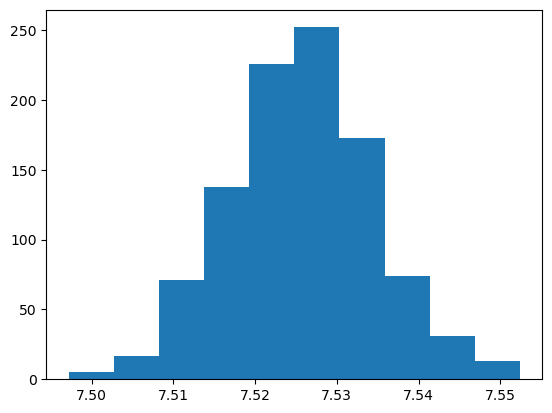

In [62]:
import matplotlib.pyplot as plt

plt.hist(mean_flavors_1000)

In [64]:
coffee_sample = df_coffee[['variety', 'country_of_origin', 'flavor']].\
reset_index().sample(n=500)
coffee_sample

index  variety             country_of_origin  flavor
903     903  Bourbon                     Guatemala    7.33
359     359     None                      Ethiopia    7.75
398     398  Caturra                      Colombia    7.58
1293   1293    Pacas                      Honduras    7.17
897     897   Typica                        Taiwan    7.42
...     ...      ...                           ...     ...
768     768    Other                        Mexico    7.50
752     752  Caturra                      Colombia    7.42
417     417   Catuai                    Costa Rica    7.50
669     669  Caturra                     Guatemala    7.33
1019   1019    Other  Tanzania, United Republic Of    7.17

[500 rows x 4 columns]

#The bootstrap of mean coffee flavors: Bootstrap, √∂rneklem b√ºy√ºkl√ºƒü√ºn√º artƒ±rmadan, mevcut veri √ºzerinden bir√ßok yeniden √∂rnekleme (resampling) yaparak, istatistiksel belirsizliƒüi ve g√ºven aralƒ±klarƒ±nƒ± tahmin etmek i√ßin kullanƒ±lan bir y√∂ntemdir. Temelde, mevcut veri k√ºmesinden rastgele √∂rneklem almak ve her √∂rneklem i√ßin istatistiksel bir hesaplama yapmak anlamƒ±na gelir.

In [67]:
import numpy as np

mean_flavors_5000 = []

for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor']))

(array([   4.,   25.,  183.,  661., 1320., 1450.,  895.,  374.,   81.,
           7.]),
 array([7.46104 , 7.472676, 7.484312, 7.495948, 7.507584, 7.51922 ,
        7.530856, 7.542492, 7.554128, 7.565764, 7.5774  ]),
 <BarContainer object of 10 artists>)

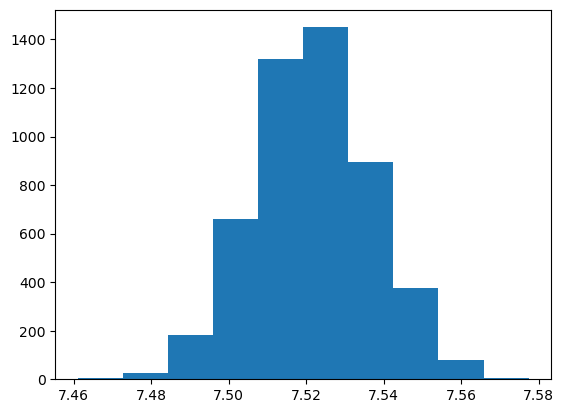

In [68]:
import matplotlib.pyplot as plt

plt.hist(mean_flavors_5000)

In [70]:
coffee_sample['flavor'].mean()

7.5215

In [73]:
np.mean(mean_flavors_5000)

7.521865335999999

In [75]:
df_coffee['flavor'].mean()

7.526046337817639

In [77]:
coffee_sample['flavor'].std()

0.33973812560261185

In [79]:
#bootstrap'in standart sapma
np.std(mean_flavors_5000,ddof=1)

0.015113079402984425

In [81]:
#bootstrap √∂rneklem standart hatasƒ±
np.std(mean_flavors_5000, ddof=1) * np.sqrt(500)

0.33793872894425114

(array([   4.,   25.,  183.,  661., 1320., 1450.,  895.,  374.,   81.,
           7.]),
 array([7.46104 , 7.472676, 7.484312, 7.495948, 7.507584, 7.51922 ,
        7.530856, 7.542492, 7.554128, 7.565764, 7.5774  ]),
 <BarContainer object of 10 artists>)

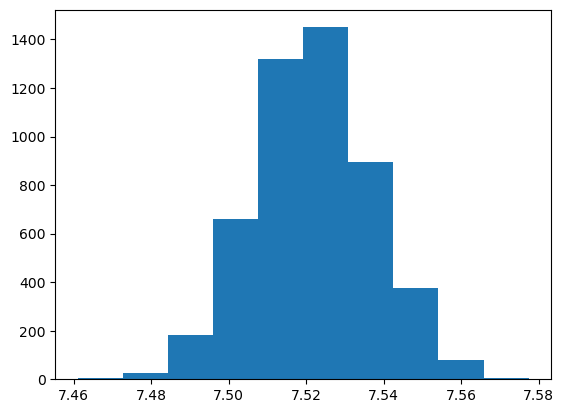

In [85]:
plt.hist(mean_flavors_5000)

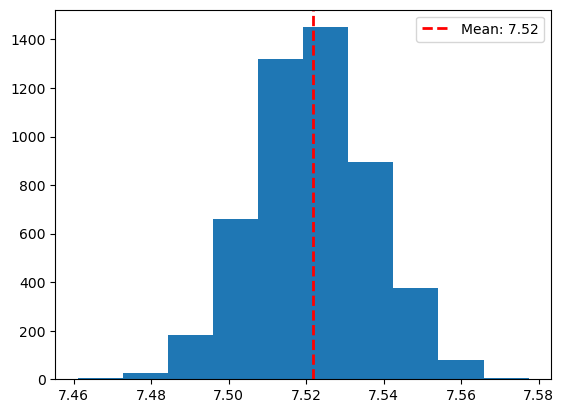

In [87]:
plt.hist(mean_flavors_5000);
plt.axvline(np.mean(mean_flavors_5000), color='red', linestyle='dashed', 
            linewidth=2, label=f'Mean: {np.mean(mean_flavors_5000):.2f}')
plt.legend()

#plt.axvline(): Bu fonksiyon, bir dikey √ßizgi √ßizer. √áizgi, histogram √ºzerinde x eksenine paralel bir √ßizgi olacak ≈üekilde yerle≈ütirilir.
np.mean(mean_flavors_5000): Bu kƒ±sƒ±m, mean_flavors_5000 listesinde yer alan 5000 √∂rneklem ortalamasƒ±nƒ±n ortalamasƒ±nƒ± hesaplar.
color='red': √áizginin rengini kƒ±rmƒ±zƒ± yapar.
linestyle='dashed': √áizginin tarzƒ±nƒ± kesikli yapar.
linewidth=2: √áizginin kalƒ±nlƒ±ƒüƒ±nƒ± belirler (bu durumda 2 birim).
label=f'Mean: {np.mean(mean_flavors_5000):.2f}': √áizginin yanƒ±na, ortalamayƒ± g√∂steren bir etiket ekler. Bu etiket kƒ±rmƒ±zƒ± √ßizgiyi tanƒ±mlar ve ortalama deƒüeri (2 ondalƒ±klƒ±) g√∂sterir.

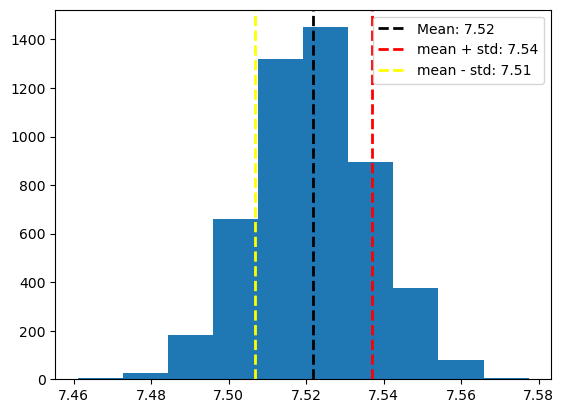

In [90]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2, label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2, label=f'mean - std: {minus_one_std:.2f}')

plt.legend()



#plus_one_std: Bu satƒ±r, ortalamaya bir standart sapma ekler. Yani, ortalamanƒ±n saƒüƒ±ndaki 1 standart sapmayƒ± temsil eder.
np.std(mean_flavors_5000, ddof=1): Bu, mean_flavors_5000 listesinde yer alan 5000 √∂rneklem ortalamasƒ±nƒ±n standart sapmasƒ±nƒ± hesaplar.
minus_one_std: Bu satƒ±r, ortalamadan bir standart sapma √ßƒ±karƒ±r. Yani, ortalamanƒ±n solundaki 1 standart sapmayƒ± temsil eder.

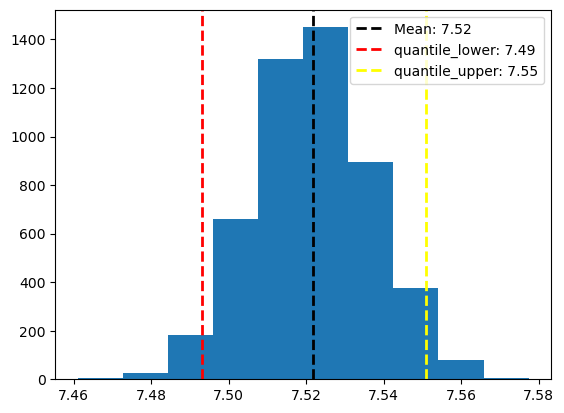

In [93]:
quantile_lower = np.quantile(mean_flavors_5000, 0.025)
quantile_upper = np.quantile(mean_flavors_5000, 0.975)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(quantile_lower, color='red', linestyle='dashed', linewidth=2, label=f'quantile_lower: {quantile_lower:.2f}')

plt.axvline(quantile_upper, color='yellow', linestyle='dashed', linewidth=2, label=f'quantile_upper: {quantile_upper:.2f}')

plt.legend()

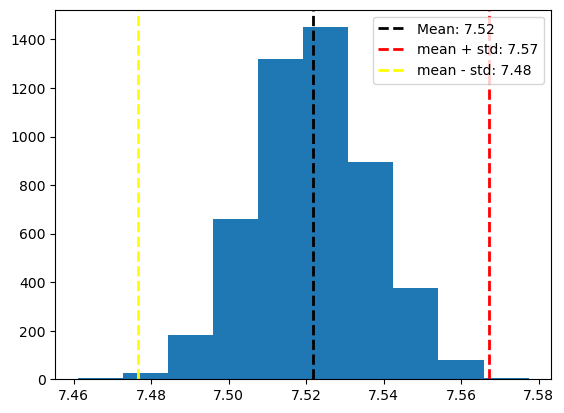

In [95]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + 3 * np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - 3 * np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2, label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2, label=f'mean - std: {minus_one_std:.2f}')

plt.legend()

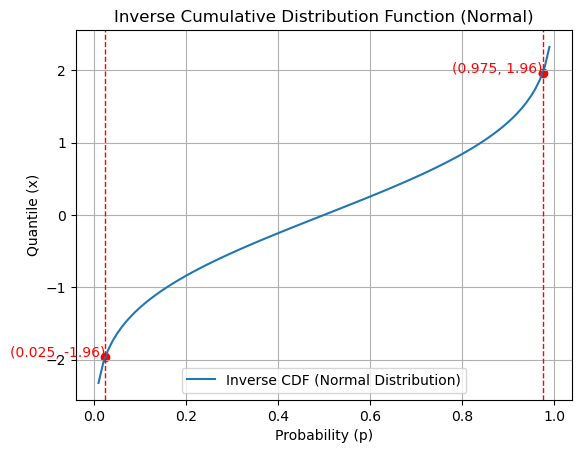

In [97]:
from scipy.stats import norm

p_values = np.linspace(0, 1, 100)

quantiles = norm.ppf(p_values, loc=0, scale=1) #verilen olasƒ±lƒ±k deƒüerlerine kar≈üƒ±lƒ±k gelen kuantil (quantile) deƒüerlerini hesaplar. Burada loc=0 ve scale=1 parametreleri, standart normal daƒüƒ±lƒ±m (ortalama 0, standart sapma 1) kullanƒ±larak hesaplama yapƒ±lmasƒ±nƒ± saƒülar.quantiles listesi, her bir olasƒ±lƒ±k deƒüeri i√ßin kar≈üƒ±lƒ±k gelen normal daƒüƒ±lƒ±mdaki kuantil deƒüerlerini tutar.

plt.plot(p_values, quantiles, label="Inverse CDF (Normal Distribution)")

p1, p2 = 0.025, 0.975
quantile_025 = norm.ppf(p1)
quantile_975 = norm.ppf(p2)

plt.scatter([p1, p2], [quantile_025, quantile_975], color='red')  # Noktalarƒ± √ßiz
plt.axvline(p1, color='red', linestyle='dashed', linewidth=1)  # p1 i√ßin dikey √ßizgi
plt.axvline(p2, color='red', linestyle='dashed', linewidth=1)  # p2 i√ßin dikey √ßizgi

# X ve Y deƒüerlerini grafikte g√∂sterelim
plt.text(p1, quantile_025, f'({p1:.3f}, {quantile_025:.2f})', color='red', fontsize=10, ha='right')
plt.text(p2, quantile_975, f'({p2:.3f}, {quantile_975:.2f})', color='red', fontsize=10, ha='right')



plt.xlabel("Probability (p)")
plt.ylabel("Quantile (x)")
plt.title("Inverse Cumulative Distribution Function (Normal)")
plt.grid(True)
plt.legend()
plt.show()




Normal Daƒüƒ±lƒ±mƒ±n Ters K√ºm√ºlatif Daƒüƒ±lƒ±m Fonksiyonu (Inverse CDF):

Grafikteki eƒüri, verilen bir olasƒ±lƒ±k deƒüeri i√ßin normal daƒüƒ±lƒ±mdan elde edilen deƒüerin nasƒ±l deƒüi≈ütiƒüini g√∂sterir. Bu, normal daƒüƒ±lƒ±mƒ±n k√ºm√ºlatif daƒüƒ±lƒ±m fonksiyonunun tersidir.
√ñrneƒüin, belirli bir olasƒ±lƒ±k deƒüeri (p = 0.025 veya p = 0.975) verildiƒüinde, bu olasƒ±lƒ±ƒüa kar≈üƒ±lƒ±k gelen x deƒüeri (kuantil) hesaplanƒ±r. Bu, normal daƒüƒ±lƒ±mƒ±n alt ve √ºst u√ßlarƒ±nƒ± (yani, g√ºven aralƒ±ƒüƒ±nƒ±n sƒ±nƒ±rlarƒ±nƒ±) g√∂sterir.
%95 G√ºven Aralƒ±ƒüƒ±:

p1 = 0.025 ve p2 = 0.975 noktalarƒ± %95 g√ºven aralƒ±ƒüƒ±nƒ±n alt ve √ºst sƒ±nƒ±rlarƒ±nƒ± temsil eder. Bu deƒüerler, %95 olasƒ±lƒ±kla, normal daƒüƒ±lƒ±mdan alƒ±nan verilerin bu aralƒ±k i√ßinde yer alacaƒüƒ±nƒ± belirtir.
Kƒ±rmƒ±zƒ± √ßizgiler ve kƒ±rmƒ±zƒ± noktalar, %95 g√ºven aralƒ±ƒüƒ±nƒ±n sƒ±nƒ±rlarƒ±nƒ± i≈üaret eder. Bu, √∂rneklemlerden elde edilen istatistiklerin bu aralƒ±k i√ßinde yer almasƒ±nƒ±n olasƒ±lƒ±ƒüƒ±nƒ± g√∂sterir.
Grafiƒüin Ne G√∂sterdiƒüi ve Neyi Kanƒ±tladƒ±ƒüƒ±:
Olasƒ±lƒ±k ve Deƒüer Arasƒ±ndaki ƒ∞li≈ükiyi G√∂sterir: Grafik, belirli olasƒ±lƒ±k deƒüerlerinin normal daƒüƒ±lƒ±mdaki kar≈üƒ±lƒ±k gelen kuantil deƒüerlerine nasƒ±l d√∂n√º≈üt√ºƒü√ºn√º g√∂sterir. Yani, belirli bir olasƒ±lƒ±k i√ßin, bu olasƒ±lƒ±ƒüa denk gelen normal daƒüƒ±lƒ±mdaki deƒüeri (x deƒüeri) hesaplar.
G√ºven Aralƒ±ƒüƒ±nƒ±n G√∂rselle≈ütirilmesi: %95 g√ºven aralƒ±ƒüƒ±nƒ± ve kuantilleri g√∂stererek, √∂rneklemden elde edilen verilerin pop√ºlasyon parametrelerine ne kadar yakƒ±n olduƒüunu anlamamƒ±za yardƒ±mcƒ± olur. %95'lik bir g√ºvenle, verilerin bu aralƒ±k i√ßinde yer alacaƒüƒ±nƒ± √∂ng√∂rebiliriz.

In [100]:
df_stck = pd.read_feather("data/stack_overflow.feather")
df_stck

respondent                                        main_branch hobbyist  \
0           36.0  I am not primarily a developer, but I write co...      Yes   
1           47.0                     I am a developer by profession      Yes   
2           69.0                     I am a developer by profession      Yes   
3          125.0  I am not primarily a developer, but I write co...      Yes   
4          147.0  I am not primarily a developer, but I write co...       No   
...          ...                                                ...      ...   
2256     62812.0                     I am a developer by profession      Yes   
2257     62835.0                     I am a developer by profession      Yes   
2258     62837.0                     I am a developer by profession      Yes   
2259     62867.0  I am not primarily a developer, but I write co...      Yes   
2260     62882.0                     I am a developer by profession      Yes   

       age  age_1st_code age_first_code_cut comp_freq  comp_total  \
0     34.0          30.0              adult    Yearly     60000.0   
1     53.0          10.0              child    Yearly     58000.0   
2     25.0          12.0              child    Yearly    550000.0   
3     41.0          30.0              adult   Monthly    200000.0   
4     28.0          15.0              adult    Yearly     50000.0   
...    ...           ...                ...       ...         ...   
2256  40.0          10.0              child    Yearly    145000.0   
2257  23.0           9.0              child   Monthly    180000.0   
2258  27.0           8.0              child   Monthly      7500.0   
2259  33.0          13.0              child   Monthly      6000.0   
2260  28.0          13.0              child    Yearly    180000.0   

      converted_comp             country  ...          survey_length trans  \
0            77556.0      United Kingdom  ...  Appropriate in length    No   
1            74970.0      United Kingdom  ...  Appropriate in length    No   
2           594539.0              France  ...              Too short    No   
3          2000000.0       United States  ...  Appropriate in length    No   
4            37816.0              Canada  ...  Appropriate in length    No   
...              ...                 ...  ...                    ...   ...   
2256        145000.0       United States  ...               Too long    No   
2257         33972.0  Russian Federation  ...              Too short    No   
2258         97284.0             Germany  ...  Appropriate in length    No   
2259         72000.0              Panama  ...               Too long    No   
2260        180000.0       United States  ...  Appropriate in length    No   

                                        undergrad_major  \
0     Computer science, computer engineering, or sof...   
1     A natural science (such as biology, chemistry,...   
2     Computer science, computer engineering, or sof...   
3                                                  None   
4     Another engineering discipline (such as civil,...   
...                                                 ...   
2256  Computer science, computer engineering, or sof...   
2257  Computer science, computer engineering, or sof...   
2258                          Mathematics or statistics   
2259  Another engineering discipline (such as civil,...   
2260  Computer science, computer engineering, or sof...   

           webframe_desire_next_year  \
0                   Express;React.js   
1                       Flask;Spring   
2                       Django;Flask   
3                               None   
4                               None   
...                              ...   
2256                    Flask;jQuery   
2257                    ASP.NET Core   
2258                            None   
2259                            None   
2260  Angular;Express;Flask;React.js   

                                webframe_worked_with  \
0                                

In [104]:
from scipy.stats import norm

lower = norm.ppf(0.025) #bu satƒ±r %2.5 olasƒ±lƒ±ƒüƒ±na kar≈üƒ±lƒ±k gelen deƒüeri, yani g√ºven aralƒ±ƒüƒ±nƒ±n alt sƒ±nƒ±rƒ±nƒ± hesaplar.
upper = norm.ppf(0.975) #g√ºven aralƒ±ƒüƒ±nƒ±n √ºst sƒ±nƒ±rƒ±nƒ± verir

print(lower,upper)


-1.9599639845400545 1.959963984540054


In [51]:
mean_comp_samp = df_stck['converted_comp'].mean()
mean_comp_samp

119574.71738168952

In [102]:
import numpy as np

so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        np.mean(
            df_stck.sample(frac=1, replace=True)['converted_comp']))

(array([  1.,   0.,   1.,   0.,   0.,   5.,   3.,   8.,   6.,  13.,   8.,
         26.,  26.,  49.,  83.,  96., 124., 144., 181., 215., 225., 260.,
        274., 277., 289., 294., 291., 275., 290., 290., 229., 222., 162.,
        126., 126.,  85.,  81.,  55.,  44.,  34.,  25.,  18.,   9.,  14.,
          7.,   6.,   1.,   1.,   0.,   1.]),
 array([ 97548.26448474,  98404.93944272,  99261.61440071, 100118.28935869,
        100974.96431667, 101831.63927466, 102688.31423264, 103544.98919062,
        104401.66414861, 105258.33910659, 106115.01406457, 106971.68902256,
        107828.36398054, 108685.03893852, 109541.71389651, 110398.38885449,
        111255.06381247, 112111.73877046, 112968.41372844, 113825.08868642,
        114681.76364441, 115538.43860239, 116395.11356037, 117251.78851835,
        118108.46347634, 118965.13843432, 119821.8133923 , 120678.48835029,
        121535.16330827, 122391.83826625, 123248.51322424, 124105.18818222,
        124961.8631402 , 125818.53809819, 126675.2

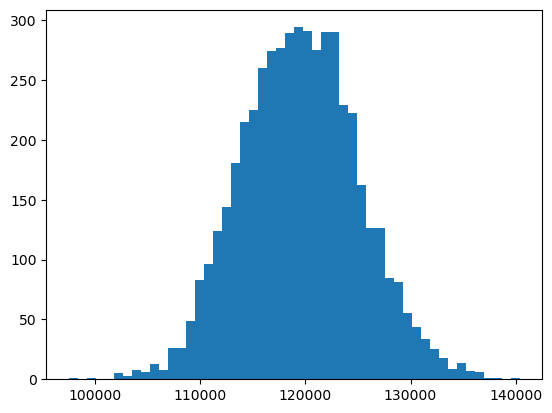

In [103]:
import matplotlib.pyplot as plt

plt.hist(so_boot_distn,bins=50)

In [104]:
std_error = np.std(so_boot_distn, ddof=1)
std_error
#Bu satƒ±rda hesaplanan standart hata, so_boot_distn i√ßindeki √∂rneklem ortalamalarƒ±nƒ±n daƒüƒ±lƒ±mƒ±nƒ±n yayƒ±lmasƒ±nƒ± √∂l√ßer. Ba≈üka bir deyi≈üle, bu deƒüer, bootstrap daƒüƒ±lƒ±mƒ±nƒ±n ne kadar yayƒ±lmƒ±≈ü olduƒüunu g√∂sterir.
Standart hata, genellikle bir parametrenin tahmininin g√ºvenilirliƒüini deƒüerlendirmek i√ßin kullanƒ±lƒ±r. Bootstrap y√∂ntemi ile hesaplanan standart hata, veri k√ºmesinin ortalama deƒüeri hakkƒ±nda ne kadar belirsizlik olduƒüunu g√∂sterir.

5575.344959960513

In [105]:
mean_comp_hyp = 110000

In [106]:
z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score

1.7173318333575067

## Z-skoru,
bir √∂rneklem ortalamasƒ±nƒ±n (veya herhangi bir deƒüerin) normal daƒüƒ±lƒ±mdaki beklenen deƒüere (hipotez deƒüeri) ne kadar uzak olduƒüunu √∂l√ßen bir standartla≈ütƒ±rƒ±lmƒ±≈ü deƒüerdir. 
 Bu form√ºlde, √∂rneklem ortalamasƒ± ile beklenen deƒüer arasƒ±ndaki fark, standart hata ile b√∂l√ºn√ºr. Bu, √∂rneklem ortalamasƒ±nƒ±n, beklenen (hipotez) deƒüere ne kadar uzak olduƒüunu standart hata cinsinden g√∂sterir.

# Z-skoru genellikle ≈üunu g√∂sterir:

Eƒüer z-skoru b√ºy√ºkse, √∂rneklem ortalamasƒ± beklenen deƒüerden olduk√ßa uzak demektir.
Eƒüer z-skoru k√º√ß√ºkse, √∂rneklem ortalamasƒ± beklenen deƒüere √ßok yakƒ±n demektir.
Z-skoru > 2 genellikle anlamlƒ± bir farkƒ± g√∂sterir (√∂zellikle %95 g√ºven aralƒ±ƒüƒ±nda).

Z-skoru < -2 de aynƒ± ≈üekilde anlamlƒ± bir farkƒ± g√∂sterir.

Eƒüer z-skoru 0'a yakƒ±nsa, bu, √∂rneklem ortalamasƒ±nƒ±n beklenen deƒüere yakƒ±n olduƒüunu g√∂sterir.

## Z-Skorunun Yorumlanmasƒ±:
Z-skoru 0'dan b√ºy√ºk olduƒüunda, √∂rneklem ortalamasƒ± beklenen deƒüerden pozitif y√∂nde uzakla≈ümƒ±≈ü demektir.
Bu durumda z-skoru 1.7173 olduƒüu i√ßin, √∂rneklem ortalamasƒ± beklenen deƒüerden 1.7173 standart hata uzaklƒ±kta demektir.
Bu deƒüeri %95 g√ºven aralƒ±ƒüƒ± ile deƒüerlendirdiƒüimizde, z-skorunun genellikle -1.96 ile +1.96 arasƒ±nda olmasƒ± gerektiƒüi kabul edilir. Yani, 1.7173, bu aralƒ±ƒüa yakƒ±n bir deƒüerdir, ancak bu durumda hipotez testi yapƒ±lƒ±rsa, hipotezi reddetmek i√ßin yeterli bir fark olu≈ümaz. Bu durumda hipotez reddedilmez √ß√ºnk√º fark √ßok b√ºy√ºk deƒüil.

Sonu√ß:
Bu z-skoru, beklenen deƒüerden √ßok b√ºy√ºk bir sapma olmadƒ±ƒüƒ±nƒ± ve √∂rneklem ortalamasƒ±nƒ±n beklenen deƒüere yakƒ±n olduƒüunu g√∂sterir.
Genelde, z-skoru 2'nin √ºzerinde olduƒüunda, √∂rneklem ortalamasƒ± ve beklenen deƒüer arasƒ±nda √∂nemli bir fark olduƒüu kabul edilir, ancak burada fark o kadar b√ºy√ºk deƒüil.
Bu durumda z-skorunun bu deƒüeri g√∂sterdiƒüi, √∂rneklemin beklenen deƒüere yakƒ±n olduƒüunu ve hipotezin reddedilmeyeceƒüini d√º≈ü√ºnd√ºrmektedir.

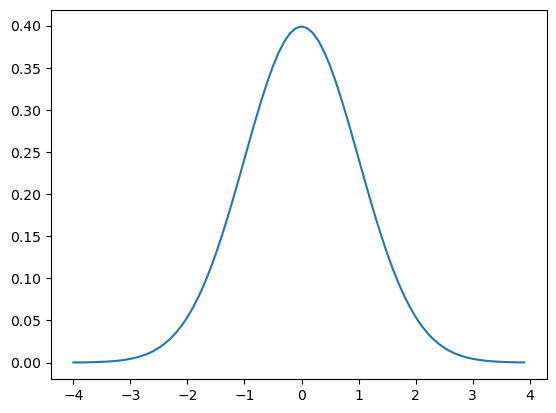

In [107]:
#z ortalamasƒ± 0 sapmasƒ± 1 olan bir daƒüƒ±lƒ±mdƒ±r
from scipy.stats import norm
z_data = np.arange(-4, 4, 0.1)
plt.plot(z_data, norm.pdf(z_data, loc = 0, scale = 1))

plt.plot(z_data, norm.pdf(z_data, loc = 0, scale = 1)):

norm.pdf() fonksiyonu, verilen z_data deƒüerleri i√ßin standart normal daƒüƒ±lƒ±mƒ±n olasƒ±lƒ±k yoƒüunluk fonksiyonunu hesaplar. loc=0 ve scale=1 parametreleri, standart normal daƒüƒ±lƒ±mƒ±n ortalamasƒ±nƒ±n 0 ve standart sapmasƒ±nƒ±n 1 olduƒüunu belirtir.
plt.plot() fonksiyonu, z_data (x ekseni) ve norm.pdf() (y ekseni) kullanarak bir √ßizgi grafiƒüi olu≈üturur.

Bu grafik, standart normal daƒüƒ±lƒ±mƒ± g√∂rselle≈ütirir. Grafikte x ekseni z-deƒüerlerini (standart normal daƒüƒ±lƒ±mdaki herhangi bir deƒüeri) temsil ederken, y ekseni bu z-deƒüerlerinin olasƒ±lƒ±k yoƒüunluklarƒ±nƒ± (PDF) temsil eder.

Grafik, z-deƒüeri 0'da maksimum olur ve her iki tarafta simetrik olarak azalƒ±r.
Bu, standart normal daƒüƒ±lƒ±mƒ±n tipik √ßan eƒürisini g√∂sterir.







In [108]:
#z skoru hesaplanƒ±rken p deƒüerleri 0 hipotezi i√ßin desteƒüin g√ºc√ºn√º √∂√∂l√ßer. 
first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(
        np.mean(
            (df_stck.sample(frac=1, replace=True)
             ['age_first_code_cut'] == 'child').mean()
        )
    )
    #Kodda, z-skoru hesaplanƒ±rken p-deƒüerleri 0 hipotezi (null hypothesis) i√ßin desteƒüin g√ºc√ºn√º √∂l√ßer.
Bootstrap daƒüƒ±lƒ±mƒ± ile elde edilen 'child' oranlarƒ± √ºzerinden, hipotez testi yapƒ±labilir ve z-skoru kullanƒ±larak √∂rneklem oranƒ±nƒ±n beklenen deƒüerden ne kadar uzak olduƒüu hesaplanabilir.


In [117]:
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean()
prop_child_samp

0.39141972578505085

In [119]:
prop_child_hyp = 0.35

In [121]:
std_err = np.std(first_code_boot_distn, ddof=1)
std_err 

0.010287467713481485

In [123]:
z_score = (prop_child_samp - prop_child_hyp) / std_err
z_score #ort 0 std 1 z daƒüƒ±lƒ±mƒ± denir

4.02623142435444

In [ ]:
prop_child_samp: 'child' olan deƒüerlerin √∂rneklemdeki oranƒ±.
prop_child_hyp: Hipotez edilen oran (beklenen oran, burada %35).
std_err: Standart hata, bootstrap √∂rneklem daƒüƒ±lƒ±mƒ±ndaki oranlarƒ±n yayƒ±lmasƒ±nƒ± √∂l√ßer.
z_score: Z-skoru, √∂rneklem oranƒ±nƒ±n hipotez oranƒ±ndan ne kadar uzak olduƒüunu standart hata cinsinden √∂l√ßer. Buradaki z-skoru deƒüeri 4.026 olduk√ßa b√ºy√ºk olduƒüu i√ßin istatiksel olarak anlamlƒ± bir fark olduƒüunu g√∂sterir.

In [127]:
#saƒü kuyruk testi olsuƒüu i√ßin 1 den √ßƒ±karƒ±lƒ±r
from scipy.stats import norm

1- norm.cdf(z_score, loc=0, scale=1) #h0 reddedilir k√º√ß√ºk √ßƒ±kƒ±yor!

2.8338954363160695e-05

In [ ]:
Z-skoru 4.026 olduƒüu i√ßin, p-deƒüeri genellikle √ßok k√º√ß√ºk olacaktƒ±r (√ßok d√º≈ü√ºk bir olasƒ±lƒ±k). Bu, hipotez testinde null hipotezini reddetmek anlamƒ±na gelir.

√ñzet:
norm.cdf(z_score): Z-skorunun solundaki alanƒ± hesaplar (olasƒ±lƒ±k).
1 - norm.cdf(z_score): Z-skorunun saƒüƒ±ndaki alanƒ± hesaplar (p-deƒüeri).
Saƒü kuyruk testi i√ßin kullanƒ±lƒ±r; p-deƒüeri k√º√ß√ºkse mesela 0.05ten, null hipotezi reddedilir.

In [129]:
from scipy.stats import norm

alpha = 0.05  # Anlamlƒ±lƒ±k seviyesi (genellikle %5)
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean()  # √ñrneklemdeki 'child' oranƒ±
prop_child_hyp = 0.35  # Hipotez edilen √ßocuk oranƒ± (null hipotezi)

std_err = np.std(first_code_boot_distn, ddof=1)  # Standart hata (bootstrap daƒüƒ±lƒ±mƒ±ndan)
z_score = (prop_child_samp - prop_child_hyp) / std_err  # Z-skoru hesaplama

p_value = 1 - norm.cdf(z_score, loc=0, scale=1)  # Saƒü kuyruk testi ile p-deƒüeri hesaplama
p_value  # p-deƒüerini yazdƒ±rma


2.8338954363160695e-05

Bu satƒ±rda, anlamlƒ±lƒ±k seviyesi (genellikle %5) belirlenmi≈ütir. Bu, p-deƒüerinin 0.05'ten k√º√ß√ºk olup olmadƒ±ƒüƒ±nƒ± test edeceƒüimiz sƒ±nƒ±rdƒ±r. Eƒüer p-deƒüeri 0.05'ten k√º√ß√ºkse, null hipotezi reddedilir.
prop_child_samp = (df_stck['age_first_code_cut'] == 'child').mean():

Bu satƒ±r, df_stck veri √ßer√ßevesindeki 'age_first_code_cut' s√ºtununda 'child' olan oranƒ± hesaplar.
df_stck['age_first_code_cut'] == 'child' ifadesi, 'child' olan her deƒüeri True yapar, diƒüerlerini False yapar.
.mean() bu True/False deƒüerlerinin ortalamasƒ±nƒ± alƒ±r ve 'child' oranƒ±nƒ± verir. Sonu√ß prop_child_samp olarak saklanƒ±r.
prop_child_hyp = 0.35:

Bu satƒ±rda, hipotez edilen oran yani null hipotezi oranƒ± belirlenir. Burada 0.35 (yani %35) √ßocuk oranƒ± hipotez olarak kabul edilmi≈ütir.
std_err = np.std(first_code_boot_distn, ddof=1):

Bu satƒ±rda, standart hata hesaplanƒ±r. first_code_boot_distn bootstrap √∂rneklem daƒüƒ±lƒ±mƒ±ndaki √ßocuk oranlarƒ±nƒ±n daƒüƒ±lƒ±mƒ±nƒ± tutar.
np.std(..., ddof=1) fonksiyonu, bu daƒüƒ±lƒ±mdaki √∂rneklemdeki standart sapmayƒ± Bessel d√ºzeltmesi ile hesaplar. Bu, daha g√ºvenilir bir standart hata tahmini saƒülar.
z_score = (prop_child_samp - prop_child_hyp) / std_err:

Bu satƒ±rda z-skoru hesaplanƒ±r. Z-skoru, √∂rneklem oranƒ± ile hipotez oranƒ± arasƒ±ndaki farkƒ± standart hata ile b√∂ler.
Z-skoru, √∂rneklem oranƒ±nƒ±n hipotez oranƒ±ndan ne kadar uzakla≈ütƒ±ƒüƒ±nƒ± ve bu farkƒ±n standart hata cinsinden ne kadar b√ºy√ºk olduƒüunu g√∂sterir.
p_value = 1 - norm.cdf(z_score, loc=0, scale=1):

norm.cdf(z_score): Bu fonksiyon, z-skorunun solundaki alanƒ± (olasƒ±lƒ±ƒüƒ±) hesaplar. Yani, z-skoru kadar olan toplam olasƒ±lƒ±ƒüƒ± hesaplar.
1 - norm.cdf(z_score): Saƒü kuyruk testi yapƒ±ldƒ±ƒüƒ± i√ßin, z-skorunun saƒüƒ±ndaki alanƒ± (p-deƒüeri) hesaplamak i√ßin 1 - CDF yapƒ±lƒ±r. Bu, p-deƒüerini verir.
Eƒüer z-skoru pozitifse, saƒüdaki alan daha k√º√ß√ºk olur ve bu, hipotez testinin anlamlƒ±lƒ±k seviyesini belirler.
p_value:

Bu, p-deƒüerini yazdƒ±rƒ±r. Eƒüer p-deƒüeri 0.05'ten k√º√ß√ºkse, null hipotezi reddedilir ve √∂rneklem oranƒ±nƒ±n hipotez oranƒ±ndan istatistiksel olarak anlamlƒ± bir farkƒ± olduƒüu kabul edilir.
√ñrnek:
Diyelim ki prop_child_samp = 0.3914 (√∂rneklemdeki 'child' oranƒ±) ve prop_child_hyp = 0.35 (beklenen oran).

Z-skoru hesaplanƒ±r ve sonra saƒü kuyruk testi yapƒ±lƒ±r.
p-deƒüeri hesaplanƒ±r. Eƒüer p-deƒüeri 0.05'ten k√º√ß√ºkse, null hipotezi reddedilir.
√ñzet:
Bu kod, proportion test kullanarak bootstrap √∂rneklem oranƒ± ile hipotez edilen oranƒ± kar≈üƒ±la≈ütƒ±rƒ±r ve saƒü kuyruk testi ile p-deƒüeri hesaplar. P-deƒüeri, √∂rneklem oranƒ±nƒ±n hipotez oranƒ±ndan ne kadar uzak olduƒüunu ve bunun istatistiksel olarak anlamlƒ± olup olmadƒ±ƒüƒ±nƒ± belirler.

In [131]:
p_value <= alpha 

True

In [141]:
#g√ºven aralƒ±klarƒ± kantiller kullanƒ±lrak yapƒ±labilir
from scipy.stats import norm

lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)

(lower,upper)
#G√ºven Aralƒ±ƒüƒ±nƒ±n Yorumlanmasƒ±:
%95 g√ºven aralƒ±ƒüƒ± genellikle %2.5 ve %97.5 kantilleri arasƒ±nda yer alƒ±r. Yani, g√ºven aralƒ±ƒüƒ±, bu kantiller arasƒ±nda bulunan deƒüerlerin %95'inin doƒüru parametreyi (√∂rneƒüin, pop√ºlasyon oranƒ±nƒ±) kapsadƒ±ƒüƒ± varsayƒ±lƒ±r.
√ñrneƒüin, eƒüer lower = 0.30 ve upper = 0.40 ise, bu, pop√ºlasyon oranƒ±nƒ±n %95 g√ºvenle %30 ile %40 arasƒ±nda olduƒüu anlamƒ±na gelir.
#Bu kod, bootstrap √∂rneklem daƒüƒ±lƒ±mƒ±ndan %2.5 ve %97.5 kantillerini kullanarak, %95 g√ºven aralƒ±ƒüƒ±nƒ± hesaplar. Bu, verinizin g√ºven aralƒ±ƒüƒ±nƒ± anlamak i√ßin yaygƒ±n bir y√∂ntemdir ve verinin merkezi eƒüilim ve belirsizliƒüini g√∂sterir.


(0.3715170278637771, 0.4117647058823529)

In [143]:
#iki √∂rneklemli problemler. t istatiƒüi:
df_stck.groupby('age_first_code_cut')['converted_comp'].mean()

#Bu kod, iki grup arasƒ±ndaki farkƒ± (√∂rneƒüin, 'adult' ve 'child' gruplarƒ± arasƒ±nda) istatistiksel olarak test etmek i√ßin kullanƒ±lƒ±r.
#Hesaplanan t-istatistiƒüi, iki grup arasƒ±ndaki farkƒ±n anlamlƒ± olup olmadƒ±ƒüƒ±nƒ± test eder.

#T-istatistiƒüi √ßok b√ºy√ºkse, gruplar arasƒ±nda istatistiksel olarak anlamlƒ± bir fark olduƒüu kabul edilir.
#Bu test, √∂zellikle iki baƒüƒ±msƒ±z grubun ortalamalarƒ±nƒ± kar≈üƒ±la≈ütƒ±rmak i√ßin kullanƒ±lƒ±r.


age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

### t-ƒ∞statistiƒüi ve Hesaplama

**t-ƒ∞statistiƒüi**, iki √∂rneklem arasƒ±ndaki ortalama farkƒ±nƒ±n anlamlƒ± olup olmadƒ±ƒüƒ±nƒ± test etmek i√ßin kullanƒ±lan bir istatistiksel testtir. Bu test, iki grup arasƒ±ndaki farkƒ±n √∂rneklem varyansƒ± ile kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±nƒ± saƒülar. √ñzellikle **iki baƒüƒ±msƒ±z grup** i√ßin, √∂rneklem b√ºy√ºkl√ºkleri ve standart sapmalarƒ± g√∂z √∂n√ºnde bulundurularak hesaplanƒ±r.

#### **Form√ºl:**

ƒ∞ki baƒüƒ±msƒ±z √∂rneklem i√ßin t-istatistiƒüi ≈üu form√ºlle hesaplanƒ±r:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

- **$\bar{x}_1$** ve **$\bar{x}_2$**: ƒ∞lk ve ikinci √∂rneklemin ortalamalarƒ±  
- **$s_1$** ve **$s_2$**: ƒ∞lk ve ikinci √∂rneklemin standart sapmalarƒ±  
- **$n_1$** ve **$n_2$**: ƒ∞lk ve ikinci √∂rneklemin b√ºy√ºkl√ºkleri  

#### **Hesaplama A≈üamalarƒ±:**

1. **√ñrneklem Ortalamalarƒ±:**
   - `adult` grubu: 111313.311047  
   - `child` grubu: 132419.570621  

2. **Standart Sapmalar:**
   - `adult` grubu: 271546.521729  
   - `child` grubu: 255585.240115  

3. **√ñrneklem B√ºy√ºkl√ºkleri:**
   - `adult` grubu: 1376  
   - `child` grubu: 885  

4. **t-ƒ∞statistiƒüi Hesaplama:**
   - Form√ºlde belirtilen verilerle t-istatistiƒüi hesaplanƒ±r.

#### **t-ƒ∞statistiƒüi Sonucu:**

Sonu√ß ≈üu ≈üekilde hesaplanmƒ±≈ütƒ±r:

$$
t = 1.8699313316221844
$$

#### **Sonu√ß Yorumlanmasƒ±:**

- Hesaplanan t-deƒüeri **1.87**'dir.
- Bu deƒüeri anlamlƒ±lƒ±k seviyeleriyle kar≈üƒ±la≈ütƒ±rarak gruplar arasƒ±ndaki farkƒ±n anlamlƒ± olup olmadƒ±ƒüƒ±nƒ± test edebiliriz.
  - Eƒüer **t-deƒüeri** kritik deƒüerden (√∂rneƒüin, 1.96) k√º√ß√ºkse, null hipotezi reddedemeyiz ve iki grup arasƒ±ndaki fark anlamlƒ± deƒüildir.
  - Eƒüer **t-deƒüeri** b√ºy√ºkse, null hipotezini reddederiz ve iki grup arasƒ±nda anlamlƒ± bir fark olduƒüunu kabul ederiz.
  
Bu durumda, **1.87**'lik t-deƒüeri **1.96‚Äôdan k√º√ß√ºk** olduƒüu i√ßin, bu iki grup arasƒ±ndaki farkƒ±n istatistiksel olarak anlamlƒ± olmadƒ±ƒüƒ± sonucuna varƒ±lƒ±r.


Hayƒ±r, kritik deƒüer ve anlamlƒ±lƒ±k d√ºzeyi birbirinden farklƒ± ama birbiriyle ili≈ükili kavramlardƒ±r:

Anlamlƒ±lƒ±k d√ºzeyi (
ùõº
Œ±): ƒ∞statistiksel testte kabul edilebilir maksimum hata (yanlƒ±≈ü pozitif) olasƒ±lƒ±ƒüƒ±nƒ± g√∂sterir. En yaygƒ±n kullanƒ±lan deƒüerler, 
ùõº
=
0.05
Œ±=0.05, 
ùõº
=
0.01
Œ±=0.01 veya 
ùõº
=
0.001
Œ±=0.001 gibi d√ºzeylerdir.

Kritik deƒüer: Se√ßilen anlamlƒ±lƒ±k d√ºzeyine ve testin tipine (tek y√∂nl√º veya √ßift y√∂nl√º test) g√∂re, istatistiksel daƒüƒ±lƒ±mdan (t-daƒüƒ±lƒ±mƒ±, Z-daƒüƒ±lƒ±mƒ± vb.) elde edilen bir e≈üik deƒüeridir. Bu deƒüerin √∂tesinde kalan test istatistiƒüi deƒüerleri, ‚Äúistatistiksel olarak anlamlƒ±‚Äù sonu√ßlarƒ± g√∂sterir.

Dolayƒ±sƒ±yla, kritik deƒüer hesaplanƒ±rken veya tablolarƒ±ndan okunurken, anlamlƒ±lƒ±k d√ºzeyi (
ùõº
Œ±) ve serbestlik derecesi (degrees of freedom) birlikte kullanƒ±lƒ±r.


In [145]:
#form√ºl√º kullanƒ±yoruz:
xbar = df_stck.groupby('age_first_code_cut')['converted_comp'].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [147]:
s = df_stck.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [149]:
n = df_stck.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [151]:
# 
df_stck.groupby('age_first_code_cut')['converted_comp'].agg(['mean', 'std', 'count']) #biri seri bir df veriyor. bu df verir!

mean            std  count
age_first_code_cut                                     
adult               111313.311047  271546.521729   1376
child               132419.570621  255585.240115    885

In [153]:
import numpy as np
pay = xbar.iloc[1] - xbar.iloc[0]
payda = np.sqrt(s.iloc[1]**2 / n.iloc[1] + s.iloc[0]**2 / n.iloc[0])
t_stat = pay /payda
t_stat

1.8699313316221844

Text(0, 0.5, 'PDF(x)')

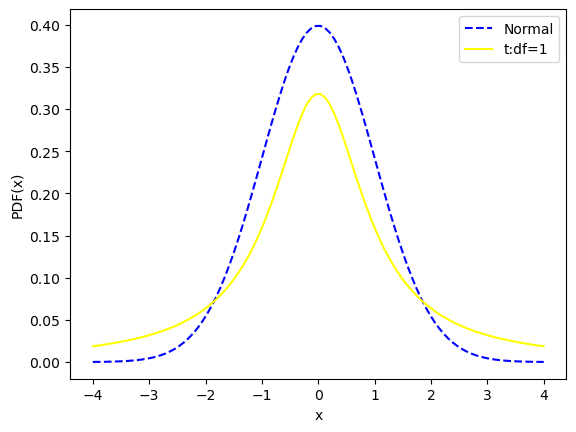

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 100)  # -4 ile 4 arasƒ±nda 100 e≈üit aralƒ±klƒ± deƒüerler olu≈üturuyoruz.
plt.plot(x, stats.norm.pdf(x), label='Normal', linestyle='--', color='blue')  # Normal daƒüƒ±lƒ±mƒ±n PDF'ini √ßiziyoruz.
plt.plot(x, stats.t.pdf(x, 1), label='t:df=1', color='yellow')  # t daƒüƒ±lƒ±mƒ±nƒ±n PDF'ini √ßiziyoruz, df=1.
plt.legend()  # Grafik i√ßin a√ßƒ±klama ekliyoruz.
plt.xlabel('x')  # x eksenini etiketliyoruz.
plt.ylabel('PDF(x)')  # y eksenini etiketliyoruz.
#Kod, normal daƒüƒ±lƒ±m ve t daƒüƒ±lƒ±mƒ±nƒ±n grafiklerini √ßiziyor.
Normal daƒüƒ±lƒ±m sabit bir ≈üekle sahiptir ve t daƒüƒ±lƒ±mƒ±, serbestlik derecesine baƒülƒ± olarak farklƒ±lƒ±k g√∂sterir.
df=1 ile √ßizilen t daƒüƒ±lƒ±mƒ±, normal daƒüƒ±lƒ±mdan daha geni≈ü ve daha kƒ±sa kuyruklara sahiptir.
Serbestlik derecesi arttƒ±k√ßa, t daƒüƒ±lƒ±mƒ± normal daƒüƒ±lƒ±ma yakla≈üƒ±r.
Grafiƒüin Yorumlanmasƒ±:
t daƒüƒ±lƒ±mƒ±, k√º√ß√ºk serbestlik dereceleri (√∂rneƒüin df=1) ile daha geni≈ü kuyruklara sahipken, serbestlik derecesi arttƒ±k√ßa (√∂rneƒüin df=30 veya df=100) normal daƒüƒ±lƒ±ma yakla≈üƒ±r.
Bu, normal daƒüƒ±lƒ±mƒ±n bir limit hali olarak t daƒüƒ±lƒ±mƒ±nƒ±n daha k√º√ß√ºk serbestlik derecelerinde farklƒ±lƒ±klar g√∂sterdiƒüini ve b√ºy√ºk serbestlik derecelerinde normal daƒüƒ±lƒ±ma yakƒ±nsadƒ±ƒüƒ±nƒ± g√∂sterir.
√ñzet:
Bu kod, normal daƒüƒ±lƒ±m ve t daƒüƒ±lƒ±mƒ±nƒ± kar≈üƒ±la≈ütƒ±ran bir grafik √ßizer. t daƒüƒ±lƒ±mƒ±, serbestlik derecesi k√º√ß√ºk olduƒüunda normal daƒüƒ±lƒ±mdan daha geni≈ü kuyruklara sahiptir ve serbestlik derecesi arttƒ±k√ßa normal daƒüƒ±lƒ±ma yakla≈üƒ±r.


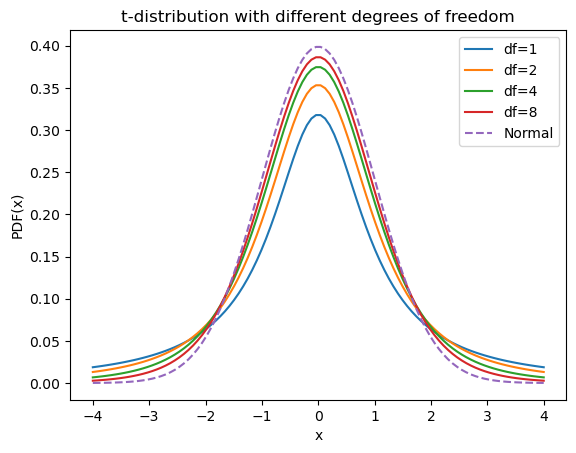

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 100)  # -4 ile 4 arasƒ±nda 100 e≈üit aralƒ±klƒ± deƒüerler olu≈üturuyoruz.

# Farklƒ± serbestlik dereceleri i√ßin t daƒüƒ±lƒ±mƒ±nƒ± √ßiziyoruz
for df in [1, 2, 4, 8]:
    plt.plot(x, stats.t.pdf(x, df), label=f'df={df}')

# Normal daƒüƒ±lƒ±mƒ± √ßiziyoruz
plt.plot(x, stats.norm.pdf(x), label='Normal', linestyle='--')

plt.legend()  # Grafik i√ßin a√ßƒ±klama ekliyoruz.
plt.title('t-distribution with different degrees of freedom')  # Ba≈ülƒ±k ekliyoruz.
plt.xlabel('x')  # x eksenini etiketliyoruz.
plt.ylabel('PDF(x)')  # y eksenini etiketliyoruz.
plt.show()  # Grafiƒüi g√∂steriyoruz.



# t daƒüƒ±lƒ±mƒ± ve normal daƒüƒ±lƒ±m grafikleri kar≈üƒ±la≈ütƒ±rƒ±ldƒ±ƒüƒ±nda:
Serbestlik derecesi d√º≈ü√ºk olduƒüunda (df=1, 2), t daƒüƒ±lƒ±mƒ± daha geni≈ü kuyruklara sahip olur. Yani, daha fazla aƒüƒ±rlƒ±k u√ß deƒüerlerde bulunur.
Serbestlik derecesi arttƒ±k√ßa (df=4, 8), t daƒüƒ±lƒ±mƒ± normal daƒüƒ±lƒ±ma daha √ßok benzer hale gelir.
Normal daƒüƒ±lƒ±m, serbestlik derecesi y√ºksek olan t daƒüƒ±lƒ±mƒ±na yakla≈üƒ±r.

In [161]:
degrees_of_freedom = n.iloc[0] + n.iloc[1] - 2
degrees_of_freedom
#n.iloc[0] = 1376 (adult grubu i√ßin),
#n.iloc[1] = 885 (child grubu i√ßin),

2259

In [163]:
from scipy.stats import t #reddedilir!
1 - t.cdf(t_stat, df=degrees_of_freedom)

#Bu kod, saƒü kuyruk testi kullanarak p-deƒüerini hesaplar. t.cdf() fonksiyonu ile t-istatistiƒüi i√ßin solundaki alan hesaplanƒ±r ve 1 - CDF ile saƒüdaki alan (p-deƒüeri) bulunur. p-deƒüeri, hipotez testinde null hipotezinin reddedilip reddedilmeyeceƒüini belirler. Eƒüer p-deƒüeri 0.05'ten k√º√ß√ºkse, null hipotezini reddederiz.

0.030811302165157595

### Kod Par√ßasƒ±nƒ±n A√ßƒ±klamasƒ±

1. **`n = df_stck.groupby('age_first_code_cut')['converted_comp'].count()`**  
   - `df_stck` isimli DataFrame‚Äôde, `'age_first_code_cut'` deƒüi≈ükenine g√∂re gruplama yaparak, her gruptaki (`adult`, `child`) g√∂zlem sayƒ±sƒ±nƒ± (`count()`) bulur. Bu sonu√ß **n** deƒüi≈ükenine atanƒ±r.  
   - √ñrneƒüin:  
     - `n.iloc[0] = 1376` ‚Üí `adult` grubundaki g√∂zlem sayƒ±sƒ±  
     - `n.iloc[1] = 885` ‚Üí `child` grubundaki g√∂zlem sayƒ±sƒ±  

2. **`degrees_of_freedom = n.iloc[0] + n.iloc[1] - 2`**  
   - ƒ∞ki baƒüƒ±msƒ±z √∂rneklem i√ßin kullanƒ±lan, klasik t-testindeki **serbestlik derecesi** (degrees of freedom) yakla≈üƒ±k olarak ≈üu form√ºlle hesaplanƒ±r:  
     $$
     df = n_1 + n_2 - 2
     $$  
   - Bu √∂rnekte, $1376 + 885 - 2 = 2259$ olarak bulunur.

3. **`from scipy.stats import t`**  
   - `scipy.stats` k√ºt√ºphanesinden `t` (Student‚Äôs t daƒüƒ±lƒ±mƒ±) import edilir. Bu k√ºt√ºphane, t daƒüƒ±lƒ±mƒ±na dair olasƒ±lƒ±k hesaplamalarƒ±nƒ± yapabilmemizi saƒülar.

4. **`1 - t.cdf(t_stat, df=degrees_of_freedom)`**  
   - `t.cdf(x, df)` fonksiyonu, t-daƒüƒ±lƒ±mƒ±nƒ±n belirli bir **df** (serbestlik derecesi) i√ßin, **x** deƒüerinin solunda kalan alanƒ± (k√ºm√ºlatif olasƒ±lƒ±ƒüƒ±) d√∂nd√ºr√ºr.
   - `t_stat`, √∂nceki adƒ±mlarda hesaplanmƒ±≈ü olan **t-istatistiƒüidir**.
   - **`1 - t.cdf(t_stat, df=degrees_of_freedom)`** ifadesi ise **t_stat** deƒüerinin saƒüƒ±nda kalan alanƒ± verir:  
     $$
     p\text{-deƒüeri} = P(T > t_\text{stat})
     $$
   - Bu, **saƒü kuyruk testi** (right-tailed test) i√ßin **p-deƒüerini** ifade eder.

5. **p-Deƒüerine G√∂re Karar Verme**  
   - Eƒüer bulunan p-deƒüer, √∂nceden belirlenen anlamlƒ±lƒ±k d√ºzeyinden (genellikle 0.05) k√º√ß√ºkse, **null hipotezi reddedilir** ve sonu√ß istatistiksel olarak anlamlƒ± bulunur.  
   - Eƒüer p-deƒüer 0.05‚Äôten b√ºy√ºkse, null hipotezini reddetmek i√ßin yeterli kanƒ±t olmadƒ±ƒüƒ± sonucuna varƒ±lƒ±r.

**Kƒ±saca:**  
Bu kod par√ßasƒ±, hesaplanmƒ±≈ü olan **t_stat** deƒüeri i√ßin saƒü taraftaki olasƒ±lƒ±ƒüƒ± (p-deƒüerini) t-daƒüƒ±lƒ±mƒ± √ºzerinden elde eder. Sonrasƒ±nda, p-deƒüeri 0.05 gibi bir anlamlƒ±lƒ±k d√ºzeyiyle kar≈üƒ±la≈ütƒ±rƒ±larak, hipotezin reddedilip reddedilmeyeceƒüine karar verilir.


In [165]:
import pandas as pd

df_election = pd.read_feather('data/repub_votes_potus_08_12.feather')

df_election

state       county  repub_percent_08  repub_percent_12
0      Alabama         Hale         38.957877         37.139882
1     Arkansas       Nevada         56.726272         58.983452
2   California         Lake         38.896719         39.331367
3   California      Ventura         42.923190         45.250693
4     Colorado      Lincoln         74.522569         73.764757
..         ...          ...               ...               ...
95   Wisconsin      Burnett         48.342541         52.437478
96   Wisconsin    La Crosse         37.490904         40.577038
97   Wisconsin    Lafayette         38.104967         41.675050
98     Wyoming       Weston         76.684241         83.983328
99      Alaska  District 34         77.063259         40.789626

[100 rows x 4 columns]

In [167]:
sample_data = df_election.copy()
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
sample_data

state       county  repub_percent_08  repub_percent_12       diff
0      Alabama         Hale         38.957877         37.139882   1.817995
1     Arkansas       Nevada         56.726272         58.983452  -2.257179
2   California         Lake         38.896719         39.331367  -0.434648
3   California      Ventura         42.923190         45.250693  -2.327503
4     Colorado      Lincoln         74.522569         73.764757   0.757812
..         ...          ...               ...               ...        ...
95   Wisconsin      Burnett         48.342541         52.437478  -4.094937
96   Wisconsin    La Crosse         37.490904         40.577038  -3.086134
97   Wisconsin    Lafayette         38.104967         41.675050  -3.570083
98     Wyoming       Weston         76.684241         83.983328  -7.299087
99      Alaska  District 34         77.063259         40.789626  36.273633

[100 rows x 5 columns]

(array([ 1.,  1.,  3., 12., 29., 28., 21.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-16.73039829, -14.08019672, -11.42999514,  -8.77979356,
         -6.12959198,  -3.4793904 ,  -0.82918882,   1.82101276,
          4.47121434,   7.12141592,   9.7716175 ,  12.42181908,
         15.07202066,  17.72222224,  20.37242382,  23.0226254 ,
         25.67282698,  28.32302856,  30.97323013,  33.62343171,
         36.27363329]),
 <BarContainer object of 20 artists>)

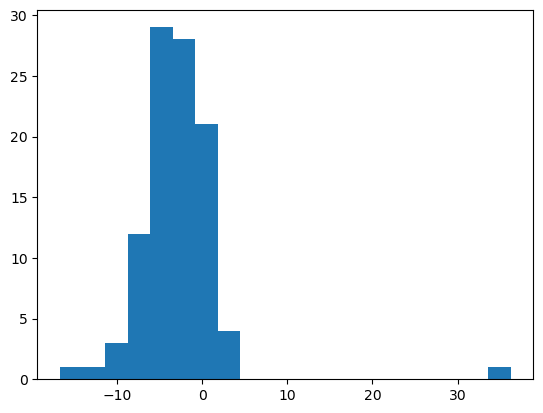

In [169]:
import matplotlib.pyplot as plt
plt.hist(sample_data['diff'], bins=20)

In [171]:
x_bar_diff = sample_data['diff'].mean()
x_bar_diff

-2.877109041242944

In [179]:
#form√ºl√º kullanalƒ±m: tek √∂rneklem t istatistiƒüi
import numpy as np

n_diff = len(sample_data) 
s_diff = sample_data['diff'].std()
t_stat = (x_bar_diff - 0) / np.sqrt(s_diff**2 / n_diff)
t_stat

-5.601043121928489

### Tek √ñrneklem T-Testi ile ƒ∞ki √ñrneklem T-Testi Arasƒ±ndaki Fark

#### 1. Tek √ñrneklem T-Testi Nedir?

- **Tanƒ±m**: Tek √∂rneklem t-testi, bir √∂rneklemin ortalamasƒ±nƒ±n belirli bir teorik veya beklenen deƒüerden (genellikle 0, 100 vb.) anlamlƒ± ≈üekilde farklƒ± olup olmadƒ±ƒüƒ±nƒ± test etmek i√ßin kullanƒ±lƒ±r.  
- **Form√ºl** (basit hali):  
  $$
  t = \frac{\bar{x} - \mu_0}{\sqrt{\frac{s^2}{n}}}
  $$
  - \(\bar{x}\): √ñrneklem ortalamasƒ±  
  - \(\mu_0\): Beklenen/pop√ºlasyon ortalamasƒ± (hipotezdeki ortalama)  
  - \(s\): √ñrneklemin standart sapmasƒ±  
  - \(n\): √ñrneklem b√ºy√ºkl√ºƒü√º  

Bu kod par√ßasƒ±nda (√∂rneƒüin 2008 ve 2012 verilerinden yaratƒ±lan **`diff`** s√ºtunu) tek bir √∂rneklem verisi (farklar) √ºzerinden, ‚Äúbu ortalama fark sƒ±fƒ±r mƒ±?‚Äù hipotezi test ediliyor. Dolayƒ±sƒ±yla **tek √∂rneklem t-testi** yapƒ±lƒ±yor.

---

#### 2. ƒ∞ki √ñrneklem T-Testi Nedir?

- **Tanƒ±m**: ƒ∞ki farklƒ± √∂rneklemin (√∂rneƒüin, iki grubun) ortalamalarƒ±nƒ±n birbirine e≈üit olup olmadƒ±ƒüƒ±nƒ± test etmek i√ßin kullanƒ±lƒ±r.  
- **Form√ºl** (baƒüƒ±msƒ±z iki √∂rneklem i√ßin):  
  $$
  t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
  $$
  - \(\bar{x}_1, \bar{x}_2\): ƒ∞ki √∂rneklemin ortalamalarƒ±  
  - \(s_1, s_2\): ƒ∞ki √∂rneklemin standart sapmalarƒ±  
  - \(n_1, n_2\): ƒ∞ki √∂rneklem b√ºy√ºkl√ºkleri  

Bu testte, iki ayrƒ± grup (√∂rneƒüin **adult** vs. **child**) i√ßin elde edilen √∂l√ß√ºmler var ve **iki farklƒ± ortalama** kar≈üƒ±la≈ütƒ±rƒ±lƒ±yor.

---

### Neden Tek √ñrneklem T-ƒ∞statistiƒüi?

Kod par√ßasƒ±nda bir *tek √∂rneklem* t-testinin form√ºl√º g√∂rmemizin nedeni:

1. **Veri Yapƒ±sƒ±**: Yalnƒ±zca **tek bir s√ºtunda** (diff) deƒüerler var. Bu s√ºtun 2008 ve 2012 verilerinin farkƒ±. Burada ‚Äútek bir √∂rnek‚Äù olarak farklar ele alƒ±nƒ±yor.  
2. **Test Edilen Hipotez**: ‚ÄúBu **fark** ortalamasƒ± sƒ±fƒ±r mƒ±?‚Äù Yani \(\mu_0 = 0\).

Dolayƒ±sƒ±yla, iki ayrƒ± grup ortalamasƒ± yerine, **tek bir daƒüƒ±lƒ±m** (farklar daƒüƒ±lƒ±mƒ±) √ºzerinden bir hedef deƒüerden (0) sapma sorgulandƒ±ƒüƒ± i√ßin **tek √∂rneklem t-testi** s√∂z konusudur.

Bir √∂nceki √∂rnekte ise:

- ƒ∞ki ayrƒ± grup (√∂rneƒüin **adult** ve **child**) vardƒ±. Her grubun kendi ortalamasƒ± ve kendi standart sapmasƒ± bulunup, **iki baƒüƒ±msƒ±z √∂rneklem t-testi** (baƒüƒ±msƒ±z iki √∂rneklem ortalamasƒ± kar≈üƒ±la≈ütƒ±rmasƒ±) uygulanƒ±yordu.

Bu iki testin **temel farkƒ±**:  
- *Tek √∂rneklemde*, aynƒ± s√ºtundan gelen deƒüerlere kar≈üƒ±lƒ±k bir teorik (sabit) ortalama kƒ±yaslanƒ±r.  
- *ƒ∞ki √∂rneklemde*, iki ayrƒ± grubun ortalamasƒ± kƒ±yaslanƒ±r.


In [185]:
from scipy.stats import t
degrees_of_freedom = n_diff -1
p_value = t.cdf(t_stat, df=degrees_of_freedom)
p_value #reddedilir k√º√ß√ºk oldupu i√ßin.08 12'den k√º√ß√ºkt√ºr. oy oranlarƒ± d√º≈üm√º≈ü

9.572537285272413e-08

In [195]:
import pingouin

pingouin.ttest(sample_data['diff'], y=0, alternative='less')

T  dof alternative         p-val          CI95%   cohen-d  \
T-test -5.601043   99        less  9.572537e-08  [-inf, -2.02]  0.560104   

             BF10     power  
T-test  1.323e+05  0.999955

pingouin.ttest(sample_data['diff'], y=0, alternative='less'):
pingouin.ttest() fonksiyonu, t-test yapmak i√ßin kullanƒ±lƒ±r. Bu fonksiyon tek √∂rneklem t-testi, baƒüƒ±msƒ±z iki √∂rneklem t-testi veya e≈üle≈ümi≈ü iki √∂rneklem t-testi gibi testleri ger√ßekle≈ütirebilir.

sample_data['diff']: Bu, testin uygulanacaƒüƒ± √∂rneklem verisi. Burada 'diff' s√ºtunu, √∂rneklem farklarƒ±nƒ± (muhtemelen bir grup ile beklenen deƒüer arasƒ±ndaki farklar) i√ßeriyor olabilir. Yani, testin yapƒ±lacaƒüƒ± veri, 'diff' deƒüerlerinin bir listesidir.

y=0: Bu parametre, testin kar≈üƒ±la≈ütƒ±rƒ±lacaƒüƒ± beklenen deƒüeri belirtir. Burada, 0 ile kar≈üƒ±la≈ütƒ±rma yapƒ±lƒ±yor, yani √∂rneklem verisinin 0'a kar≈üƒ± test edilmesi bekleniyor. Bu, tek √∂rneklem t-testinin hipotez testidir. Yani, 'diff' deƒüerlerinin 0'a kar≈üƒ± istatistiksel olarak anlamlƒ± bir fark olup olmadƒ±ƒüƒ±nƒ± test ederiz.

alternative='less': Bu parametre, testin alternatif hipotezini belirtir.

'less' deƒüeri, tek y√∂nl√º bir test olduƒüunu g√∂sterir ve beklenen deƒüerin daha k√º√ß√ºk olup olmadƒ±ƒüƒ±nƒ± test eder. Yani, alternatif hipotez 'diff' deƒüerlerinin 0'dan k√º√ß√ºk olduƒüunu √∂ne s√ºrer.
Alternatif hipotez ≈üu ≈üekilde ifade edilir: H1: Œº < 0.
Ne Yapƒ±lƒ±yor?
Bu kod, tek √∂rneklem t-testini ger√ßekle≈ütiriyor. Testin hipotezi, √∂rneklem verisinin 0'dan k√º√ß√ºk olup olmadƒ±ƒüƒ±nƒ± test eder. Yani, 'diff' verilerinin 0'dan anlamlƒ± ≈üekilde k√º√ß√ºk olup olmadƒ±ƒüƒ±nƒ± inceler.

Alternatif hipotez ≈üudur:

H0 (Null Hipotezi): √ñrneklem ortalamasƒ± 0'a e≈üittir (yani, fark yoktur).
H1 (Alternatif Hipotez): √ñrneklem ortalamasƒ± 0'dan k√º√ß√ºkt√ºr.

 **p-val (p-deƒüeri)**
- **p-val = 9.572537e-08 \(\approx 0.0000000957\)**  
  Olduk√ßa k√º√ß√ºk bir p-deƒüer olup, genellikle 0.05 anlamlƒ±lƒ±k d√ºzeyinden √ßok daha k√º√ß√ºkt√ºr. Bu nedenle, **null hipotez** (fark = 0) g√º√ßl√º bir ≈üekilde reddedilir ve farkƒ±n 0‚Äôdan k√º√ß√ºk olduƒüu sonucuna varƒ±lƒ±r.


In [197]:
pingouin.ttest(x=sample_data['repub_percent_08'], 
               y=sample_data['repub_percent_12'], paired=True, 
               alternative='less')

T  dof alternative         p-val          CI95%   cohen-d  \
T-test -5.601043   99        less  9.572537e-08  [-inf, -2.02]  0.217364   

             BF10     power  
T-test  1.323e+05  0.696338

pingouin.ttest() fonksiyonu, iki √∂rneklem arasƒ±ndaki farklarƒ± test etmek i√ßin kullanƒ±lan t-test fonksiyonudur. Burada, e≈üle≈ümi≈ü iki √∂rneklem t-testi (paired t-test) yapƒ±lacaktƒ±r.

2. x=sample_data['repub_percent_08']:
x parametresi, ilk √∂rneklemi temsil eder. Burada sample_data['repub_percent_08'], 2008 yƒ±lƒ±nda Cumhuriyet√ßi Partinin oy oranlarƒ±nƒ± i√ßeren veri s√ºtunudur.

3. y=sample_data['repub_percent_12']:
y parametresi, ikinci √∂rneklemi temsil eder. Burada sample_data['repub_percent_12'], 2012 yƒ±lƒ±nda Cumhuriyet√ßi Partinin oy oranlarƒ±nƒ± i√ßeren veri s√ºtunudur.

4. paired=True:
paired=True ifadesi, e≈üle≈ümi≈ü iki √∂rneklem t-testinin yapƒ±lacaƒüƒ±nƒ± belirtir. Bu, her bir g√∂zlemin bir e≈üle≈ümi≈ü √ßift olu≈üturduƒüunu ifade eder. Yani, 2008'deki oy oranƒ± ile 2012'deki oy oranƒ± birbirine baƒülƒ±dƒ±r ve aynƒ± birimler (√∂rneƒüin, aynƒ± eyalet ya da b√∂lge) i√ßin kar≈üƒ±la≈ütƒ±rƒ±lmaktadƒ±r.

5. alternative='less':
alternative='less' parametresi, tek y√∂nl√º bir test yapƒ±lacaƒüƒ±nƒ± belirtir. Yani, 2012 oy oranƒ±nƒ±n 2008'den daha d√º≈ü√ºk olup olmadƒ±ƒüƒ±nƒ± test ederiz.
Alternatif hipotez: 2012 oy oranƒ± 2008'den daha d√º≈ü√ºk.
Null hipotez: 2012 oy oranƒ± 2008'le aynƒ± veya daha y√ºksek.

In [193]:
pingouin.ttest(x=sample_data['repub_percent_08'], 
               y=sample_data['repub_percent_12'], 
               paired=False, alternative='less')





#x=sample_data['repub_percent_08']:
x parametresi, ilk √∂rneklem verisini temsil eder. Burada sample_data['repub_percent_08'], 2008 yƒ±lƒ±nda Cumhuriyet√ßi Partinin oy oranlarƒ±nƒ± i√ßeren veri s√ºtunudur.
3. y=sample_data['repub_percent_12']:
y parametresi, ikinci √∂rneklem verisini temsil eder. Burada sample_data['repub_percent_12'], 2012 yƒ±lƒ±nda Cumhuriyet√ßi Partinin oy oranlarƒ±nƒ± i√ßeren veri s√ºtunudur.
4. paired=False:
paired=False ifadesi, bu testin baƒüƒ±msƒ±z iki √∂rneklem t-testi olduƒüunu belirtir. Yani, 2008 ve 2012 yƒ±llarƒ±ndaki oy oranlarƒ± arasƒ±nda baƒüƒ±msƒ±z bir kar≈üƒ±la≈ütƒ±rma yapƒ±lƒ±r. Bu, e≈üle≈ümi≈ü t-test (paired t-test) yerine, baƒüƒ±msƒ±z √∂rneklem t-testi yapƒ±lacaƒüƒ± anlamƒ±na gelir.
√ñrneƒüin, 2008 ve 2012'deki veriler, aynƒ± eyalet veya b√∂lgeye ait olabilir, ancak bu testte veriler baƒüƒ±msƒ±z kabul edilir.
5. alternative='less':
alternative='less' parametresi, testin tek y√∂nl√º (right-tailed) olduƒüunu belirtir. Yani, alternatif hipotez, 2012 oy oranƒ±nƒ±n 2008'den daha d√º≈ü√ºk olduƒüunu √∂ne s√ºrer.
Alternatif hipotez: 2012 oy oranƒ± 2008'den daha d√º≈ü√ºk.
Null hipotez: 2012 oy oranƒ± 2008'le aynƒ± veya daha y√ºksek.
Ne Yapƒ±lƒ±yor?
Bu kod, baƒüƒ±msƒ±z iki √∂rneklem t-testini yaparak, 2008 ve 2012 yƒ±llarƒ±ndaki Cumhuriyet√ßi Parti'nin oy oranlarƒ± arasƒ±ndaki farkƒ±n istatistiksel olarak anlamlƒ± olup olmadƒ±ƒüƒ±nƒ± test eder. Alternatif hipotez, 2012 oy oranƒ±nƒ±n 2008'den daha d√º≈ü√ºk olduƒüunu √∂ne s√ºrer.



T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test -1.536997  198        less  0.062945  [-inf, 0.22]  0.217364  0.927   

           power  
T-test  0.454972

### `paired=True` ile `paired=False` Arasƒ±ndaki Fark

#### 1. **E≈üle≈ütirilmi≈ü (Paired) T-Test (`paired=True`)**
- **Ama√ß**: Aynƒ± g√∂zlemlerin (ya da aynƒ± birimlerin) iki farklƒ± zamanda veya iki farklƒ± ko≈üuldaki √∂l√ß√ºmlerini kar≈üƒ±la≈ütƒ±rmak.  
  - √ñrneƒüin, **aynƒ± il√ßede** 2008 se√ßimlerindeki Cumhuriyet√ßi oy y√ºzdesi ile **aynƒ± il√ßede** 2012 se√ßimlerindeki Cumhuriyet√ßi oy y√ºzdesi.  
- **√ñzelliƒüi**: Her satƒ±r (√∂rnek) i√ßin, ‚Äú√∂nceki‚Äù ve ‚Äúsonraki‚Äù √∂l√ß√ºm birbiriyle **e≈üle≈ütirilmi≈ütir**.  
- **ƒ∞statistiksel Mantƒ±k**: Veriler arasƒ±ndaki farklar √ºzerinden tek bir √∂rneklem analizi yapƒ±lƒ±r ve bu farkƒ±n ortalamasƒ±nƒ±n sƒ±fƒ±rdan farklƒ± olup olmadƒ±ƒüƒ± test edilir.  
- **Serbestlik Derecesi (dof)**: Genellikle \(n - 1\) (burada \(n\) e≈üle≈ütirilmi≈ü g√∂zlem sayƒ±sƒ±dƒ±r).  

#### 2. **Baƒüƒ±msƒ±z (Unpaired) ƒ∞ki √ñrneklem T-Test (`paired=False`)**
- **Ama√ß**: ƒ∞ki **baƒüƒ±msƒ±z** √∂rneklemin (grubun) ortalamalarƒ±nƒ± kar≈üƒ±la≈ütƒ±rmak.  
  - √ñrneƒüin, **farklƒ± il√ßelerde** (ya da tamamen farklƒ± katƒ±lƒ±mcƒ±larda) 2008 se√ßimleri ile 2012 se√ßimlerini ayrƒ± ayrƒ± ele aldƒ±ƒüƒ±nƒ±zda ve bunlarƒ±n ortalamalarƒ±nƒ± kar≈üƒ±la≈ütƒ±rdƒ±ƒüƒ±nƒ±zda, aslƒ±nda iki baƒüƒ±msƒ±z topluluk/√∂rneklem kullanƒ±rsƒ±nƒ±z.  
- **√ñzelliƒüi**: `x` ve `y` dizileri **aynƒ± birimlere** ait deƒüildir, √∂l√ß√ºmler baƒüƒ±msƒ±zdƒ±r.  
- **ƒ∞statistiksel Mantƒ±k**: Her grubun (x ve y) ortalamasƒ± ve varyansƒ± hesaplanƒ±r, iki ortalama arasƒ±ndaki farkƒ±n anlamlƒ±lƒ±ƒüƒ± test edilir.  
- **Serbestlik Derecesi (dof)**: \(n_x + n_y - 2\) (kaba form√ºl).  

---

### Hangi Durumda Hangisi Kullanƒ±lƒ±r?

- **`paired=True` (e≈üle≈ütirilmi≈ü t-testi)**:  
  ƒ∞ki √∂l√ß√ºm√ºn **aynƒ± birimlerden** (katƒ±lƒ±mcƒ±, il√ße, hasta vs.) geldiƒüi durumda tercih edilir. Tek bir birimin iki farklƒ± zaman ya da iki farklƒ± ko≈üuldaki √∂l√ß√ºmleri s√∂z konusudur.

- **`paired=False` (baƒüƒ±msƒ±z iki √∂rneklem t-testi)**:  
  ƒ∞ki **farklƒ±** grup (farklƒ± insanlar, farklƒ± il√ßeler vs.) kar≈üƒ±la≈ütƒ±rƒ±lƒ±yorsa, √∂l√ß√ºmler arasƒ±nda e≈üle≈ütirme ya da tekrar √∂l√ß√ºm yoksa kullanƒ±lƒ±r.

√ñzetle, **aynƒ± veri setinde** 2008 ve 2012 oy y√ºzdeleri ger√ßekten **aynƒ± il√ßeye ait** ise, **e≈üle≈ütirilmi≈ü t-testi** (`paired=True`) uygun olacaktƒ±r. Eƒüer iki baƒüƒ±msƒ±z grup (hi√ßbir ≈üekilde e≈üle≈ütirilmemi≈ü) varsa, **baƒüƒ±msƒ±z t-testi** (`paired=False`) kullanƒ±lƒ±r.
